In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.head() ## saara bhara hai ## low-1, moderate -2 abundant-3 

## demand mei -> very low, low, short run, longrun, high

## commodity id mei se CD hatana hai

## govt policy 0-1

## month-year ko todna hai

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,CD117,42.65,Moderate,No,Low,68577.0,0,1,4407.0,6144
1,2013-10-01,CD71,93.96,Abundant,Yes,Short-run,12263.0,0,1,291.0,6564
2,2017-01-01,CD101,49.28,Moderate,No,Long-run,34924.0,0,1,1973.0,2440
3,2016-07-01,CD132,61.08,Moderate,No,Long-run,92940.0,1,0,782.0,1546
4,2014-04-01,CD76,49.91,Low,No,Very-low,64748.0,1,0,1713.0,8749


In [5]:
test=pd.read_csv('test.csv')

In [6]:
test

,Month-year,Commodity_name
0,2020-03-02,Tomato
1,2021-05-20,Radish
2,2020-10-27,Spray Chrysanthemum
3,2021-12-22,Brinjal
4,2021-10-14,Ginger
...,...,...
64,2021-03-22,Papaya
65,2020-09-06,Apple
66,2021-07-13,Sunflower
67,2021-08-01,Lily


In [7]:
name=pd.read_csv('commodityID_and_details.csv')

In [8]:
name

,CommodityID,Commodity_name
0,CD1,Paddy
1,CD2,Wheat
2,CD3,Jowar
3,CD4,Pearl millet
4,CD5,Maize
...,...,...
137,CD138,Walnuts Inshell
138,CD139,Apricot
139,CD140,Cherry Red / Black
140,CD141,custard apple


In [9]:
train['CommodityID'].value_counts()

CD100    100
CD137     66
CD41      64
CD87      64
CD105     62
        ... 
CD109     35
CD56      34
CD79      34
CD1       33
CD44      32
Name: CommodityID, Length: 142, dtype: int64

In [10]:
sample=pd.read_csv('sample_submission.csv')

In [11]:
sample

,Month-year,Commodity_name,Minimum support price (in Rs./Quintal)
0,2020-06-01,Paddy,6144
1,2013-10-01,Wheat,6564
2,2017-01-01,Jowar,2440
3,2016-07-01,Pearl millet,1546
4,2014-04-01,Maize,8749


In [12]:
train.isna().sum()

Month-year                                0
CommodityID                               0
Production weight (in million tonnes)     0
Labour_availability                       0
Govt_policy_change                        0
Demand                                    0
Cost of production                        0
Climatic factor 1                         0
Climatic factor 2                         0
Maximum price per kg                      0
Minimum support price (in Rs./Quintal)    0
dtype: int64

In [13]:
train['Govt_policy_change']

0        No
1       Yes
2        No
3        No
4        No
       ... 
6995    Yes
6996     No
6997    Yes
6998     No
6999     No
Name: Govt_policy_change, Length: 7000, dtype: object

In [14]:
train.corr()

,Production weight (in million tonnes),Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
Production weight (in million tonnes),1.000000,-0.014300,-0.015733,-0.012656,-0.001961,0.005880
Cost of production,-0.014300,1.000000,-0.006229,0.006732,0.002962,-0.011979
Climatic factor 1,-0.015733,-0.006229,1.000000,0.001829,-0.004608,0.002323
Climatic factor 2,-0.012656,0.006732,0.001829,1.000000,0.012930,-0.003351
Maximum price per kg,-0.001961,0.002962,-0.004608,0.012930,1.000000,0.004552
Minimum support price (in Rs./Quintal),0.005880,-0.011979,0.002323,-0.003351,0.004552,1.000000


<AxesSubplot:>

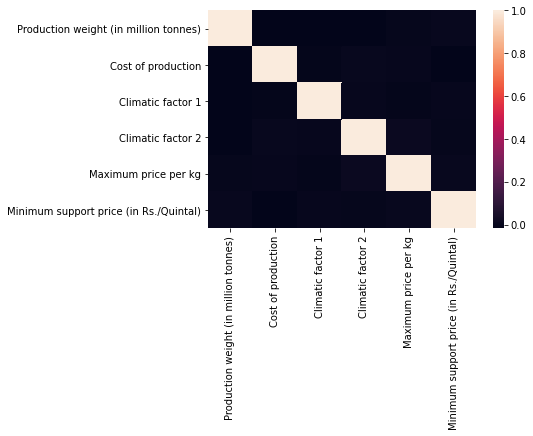

In [15]:
sns.heatmap(train.corr())

In [16]:
train.columns

Index(['Month-year', 'CommodityID', 'Production weight (in million tonnes)',
       'Labour_availability', 'Govt_policy_change', 'Demand',
       'Cost of production', 'Climatic factor 1', 'Climatic factor 2',
       'Maximum price per kg', 'Minimum support price (in Rs./Quintal)'],
      dtype='object')

In [17]:
train.loc[train.Labour_availability == 'Abundant', 'Labour_availability'] = 3

In [18]:
train.loc[train.Labour_availability == 'Moderate', 'Labour_availability'] = 2
train.loc[train.Labour_availability == 'Low', 'Labour_availability'] = 1

In [19]:
type(train['Labour_availability'][0])

int

In [20]:
train.loc[train.Demand == 'Very-low', 'Demand'] = 1

In [21]:
train.loc[train.Demand == 'Low', 'Demand'] = 2
train.loc[train.Demand == 'Short-run', 'Demand'] = 3
train.loc[train.Demand == 'Long-run', 'Demand'] = 4
train.loc[train.Demand == 'High', 'Demand'] = 5

In [22]:
train

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,CD117,42.65,2,No,2,68577.0,0,1,4407.0,6144
1,2013-10-01,CD71,93.96,3,Yes,3,12263.0,0,1,291.0,6564
2,2017-01-01,CD101,49.28,2,No,4,34924.0,0,1,1973.0,2440
3,2016-07-01,CD132,61.08,2,No,4,92940.0,1,0,782.0,1546
4,2014-04-01,CD76,49.91,1,No,1,64748.0,1,0,1713.0,8749
...,...,...,...,...,...,...,...,...,...,...,...
6995,2019-10-01,CD109,70.50,1,Yes,4,77056.0,0,0,2467.0,2779
6996,2017-01-01,CD100,67.49,2,No,2,17948.0,1,1,1149.0,2308
6997,2018-09-01,CD92,84.51,1,Yes,3,47398.0,0,1,5046.0,8097
6998,2015-03-01,CD78,35.21,3,No,1,69474.0,0,0,3407.0,3454


In [23]:
train.loc[train.Govt_policy_change == 'Yes', 'Govt_policy_change'] = 1

In [24]:
train.loc[train.Govt_policy_change == 'No', 'Govt_policy_change'] = 0

In [25]:
train

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,CD117,42.65,2,0,2,68577.0,0,1,4407.0,6144
1,2013-10-01,CD71,93.96,3,1,3,12263.0,0,1,291.0,6564
2,2017-01-01,CD101,49.28,2,0,4,34924.0,0,1,1973.0,2440
3,2016-07-01,CD132,61.08,2,0,4,92940.0,1,0,782.0,1546
4,2014-04-01,CD76,49.91,1,0,1,64748.0,1,0,1713.0,8749
...,...,...,...,...,...,...,...,...,...,...,...
6995,2019-10-01,CD109,70.50,1,1,4,77056.0,0,0,2467.0,2779
6996,2017-01-01,CD100,67.49,2,0,2,17948.0,1,1,1149.0,2308
6997,2018-09-01,CD92,84.51,1,1,3,47398.0,0,1,5046.0,8097
6998,2015-03-01,CD78,35.21,3,0,1,69474.0,0,0,3407.0,3454


<AxesSubplot:>

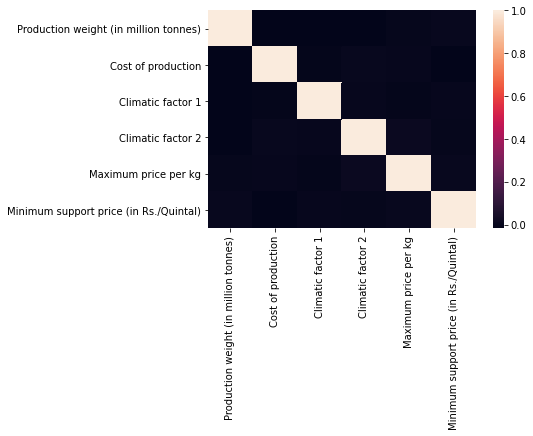

In [26]:
sns.heatmap(train.corr())

In [27]:
train.head()

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,CD117,42.65,2,0,2,68577.0,0,1,4407.0,6144
1,2013-10-01,CD71,93.96,3,1,3,12263.0,0,1,291.0,6564
2,2017-01-01,CD101,49.28,2,0,4,34924.0,0,1,1973.0,2440
3,2016-07-01,CD132,61.08,2,0,4,92940.0,1,0,782.0,1546
4,2014-04-01,CD76,49.91,1,0,1,64748.0,1,0,1713.0,8749


In [28]:
train.corr()

,Production weight (in million tonnes),Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
Production weight (in million tonnes),1.000000,-0.014300,-0.015733,-0.012656,-0.001961,0.005880
Cost of production,-0.014300,1.000000,-0.006229,0.006732,0.002962,-0.011979
Climatic factor 1,-0.015733,-0.006229,1.000000,0.001829,-0.004608,0.002323
Climatic factor 2,-0.012656,0.006732,0.001829,1.000000,0.012930,-0.003351
Maximum price per kg,-0.001961,0.002962,-0.004608,0.012930,1.000000,0.004552
Minimum support price (in Rs./Quintal),0.005880,-0.011979,0.002323,-0.003351,0.004552,1.000000


In [29]:
for i in train.columns: # saara data evenly distributed
    print(train[i].value_counts())

2014-09-01    85
2012-07-01    84
2012-05-01    84
2013-11-01    83
2018-07-01    83
              ..
2017-08-01    52
2020-07-01    51
2014-02-01    49
2015-07-01    48
2019-11-01    48
Name: Month-year, Length: 108, dtype: int64
CD100    100
CD137     66
CD41      64
CD87      64
CD105     62
        ... 
CD109     35
CD56      34
CD79      34
CD1       33
CD44      32
Name: CommodityID, Length: 142, dtype: int64
25.72    5
43.73    5
80.33    5
94.68    4
52.37    4
        ..
25.76    1
26.41    1
99.09    1
55.79    1
16.74    1
Name: Production weight (in million tonnes), Length: 5076, dtype: int64
3    2348
1    2336
2    2316
Name: Labour_availability, dtype: int64
0    3595
1    3405
Name: Govt_policy_change, dtype: int64
2    1409
5    1407
4    1400
1    1393
3    1391
Name: Demand, dtype: int64
35620.0    3
21417.0    3
25178.0    3
77445.0    3
2714.0     3
          ..
66579.0    1
54461.0    1
90559.0    1
69967.0    1
79335.0    1
Name: Cost of production, Length: 6739,

In [30]:
# Categorial -> ID, Labour_availability, govt_policy change, month_year

In [31]:
def func(s):
    return s[2:]

In [32]:
func("absss")

'sss'

In [33]:
train['CommodityID']

0       CD117
1        CD71
2       CD101
3       CD132
4        CD76
        ...  
6995    CD109
6996    CD100
6997     CD92
6998     CD78
6999     CD65
Name: CommodityID, Length: 7000, dtype: object

In [34]:
list_temp=train['CommodityID']

In [35]:
train['CommodityID']=list(map(func,list_temp))

In [36]:
train.head()

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,117,42.65,2,0,2,68577.0,0,1,4407.0,6144
1,2013-10-01,71,93.96,3,1,3,12263.0,0,1,291.0,6564
2,2017-01-01,101,49.28,2,0,4,34924.0,0,1,1973.0,2440
3,2016-07-01,132,61.08,2,0,4,92940.0,1,0,782.0,1546
4,2014-04-01,76,49.91,1,0,1,64748.0,1,0,1713.0,8749


In [37]:
train.head()

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,117,42.65,2,0,2,68577.0,0,1,4407.0,6144
1,2013-10-01,71,93.96,3,1,3,12263.0,0,1,291.0,6564
2,2017-01-01,101,49.28,2,0,4,34924.0,0,1,1973.0,2440
3,2016-07-01,132,61.08,2,0,4,92940.0,1,0,782.0,1546
4,2014-04-01,76,49.91,1,0,1,64748.0,1,0,1713.0,8749


In [38]:
train['year']=list(map(lambda s:s[:4],train['Month-year']))

In [39]:
train['month']=list(map(lambda s:s[5:7],train['Month-year']))

In [40]:
type(train['Cost of production'][0])

numpy.float64

In [41]:
train=train.drop('Month-year',axis=1)

In [42]:
for i in train.columns:
    train[i]=train[i].astype(np.int)

In [43]:
train['Govt_policy_change']=train['Govt_policy_change'].astype(np.int)

In [44]:
for i in train.columns:
    train[i]=train[i].astype(np.int)

In [45]:
train

,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal),year,month
0,117,42,2,0,2,68577,0,1,4407,6144,2020,6
1,71,93,3,1,3,12263,0,1,291,6564,2013,10
2,101,49,2,0,4,34924,0,1,1973,2440,2017,1
3,132,61,2,0,4,92940,1,0,782,1546,2016,7
4,76,49,1,0,1,64748,1,0,1713,8749,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,109,70,1,1,4,77056,0,0,2467,2779,2019,10
6996,100,67,2,0,2,17948,1,1,1149,2308,2017,1
6997,92,84,1,1,3,47398,0,1,5046,8097,2018,9
6998,78,35,3,0,1,69474,0,0,3407,3454,2015,3


In [46]:
train.corr()

,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal),year,month
CommodityID,1.000000,0.029117,0.003065,0.008331,0.001077,-0.009629,0.014728,0.000417,-0.015716,0.008478,0.020965,-0.005961
Production weight (in million tonnes),0.029117,1.000000,-0.023574,0.001601,-0.001596,-0.014404,-0.015598,-0.012948,-0.001926,0.005578,-0.000383,0.018546
Labour_availability,0.003065,-0.023574,1.000000,-0.026498,-0.010868,0.015227,0.002810,0.001365,0.007890,0.002967,0.002432,-0.009739
Govt_policy_change,0.008331,0.001601,-0.026498,1.000000,0.030459,-0.000827,0.021807,0.004707,-0.010600,0.020927,-0.006633,0.011344
Demand,0.001077,-0.001596,-0.010868,0.030459,1.000000,-0.013462,-0.006146,0.010575,-0.002804,0.001213,0.005936,-0.004177
Cost of production,-0.009629,-0.014404,0.015227,-0.000827,-0.013462,1.000000,-0.006229,0.006732,0.002962,-0.011979,0.005700,0.016340
Climatic factor 1,0.014728,-0.015598,0.002810,0.021807,-0.006146,-0.006229,1.000000,0.001829,-0.004608,0.002323,-0.009305,0.009370
Climatic factor 2,0.000417,-0.012948,0.001365,0.004707,0.010575,0.006732,0.001829,1.000000,0.012930,-0.003351,0.000870,0.014011
Maximum price per kg,-0.015716,-0.001926,0.007890,-0.010600,-0.002804,0.002962,-0.004608,0.012930,1.000000,0.004552,0.020790,0.006298
Minimum support price (in Rs./Quintal),0.008478,0.005578,0.002967,0.020927,0.001213,-0.011979,0.002323,-0.003351,0.004552,1.000000,-0.012696,0.017745


<AxesSubplot:>

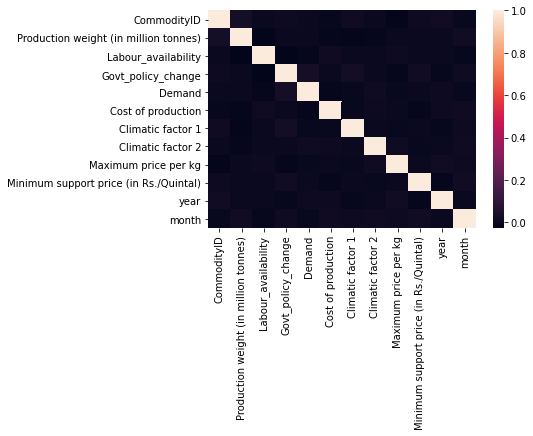

In [47]:
sns.heatmap(train.corr())

In [48]:
train['year'].value_counts()

2012    818
2013    805
2018    797
2017    790
2016    784
2015    772
2014    771
2019    733
2020    730
Name: year, dtype: int64

In [49]:
test['month']=list(map(lambda s:s[5:7],test['Month-year']))

In [50]:
test['year']=list(map(lambda s:s[:4],test['Month-year']))

In [51]:
test

,Month-year,Commodity_name,month,year
0,2020-03-02,Tomato,03,2020
1,2021-05-20,Radish,05,2021
2,2020-10-27,Spray Chrysanthemum,10,2020
3,2021-12-22,Brinjal,12,2021
4,2021-10-14,Ginger,10,2021
...,...,...,...,...
64,2021-03-22,Papaya,03,2021
65,2020-09-06,Apple,09,2020
66,2021-07-13,Sunflower,07,2021
67,2021-08-01,Lily,08,2021


In [52]:
test['year'].value_counts()

2021    41
2020    28
Name: year, dtype: int64

In [53]:
(train[train['year']==2020]['Minimum support price (in Rs./Quintal)']).sum()

3761852

In [54]:
train['year'].value_counts()

2012    818
2013    805
2018    797
2017    790
2016    784
2015    772
2014    771
2019    733
2020    730
Name: year, dtype: int64

In [55]:
all_values={}

In [56]:
for i in range (2012,2021):
    all_values[i]=(train[train['year']==i]['Minimum support price (in Rs./Quintal)']).sum()
    

In [57]:
all_values

{2012: 4306118,
 2013: 4216988,
 2014: 3925258,
 2015: 3871003,
 2016: 4045262,
 2017: 3943424,
 2018: 4146218,
 2019: 3749462,
 2020: 3761852}

In [58]:
df_temp=pd.read_csv('commodityID_and_details.csv')

In [59]:
df_temp

,CommodityID,Commodity_name
0,CD1,Paddy
1,CD2,Wheat
2,CD3,Jowar
3,CD4,Pearl millet
4,CD5,Maize
...,...,...
137,CD138,Walnuts Inshell
138,CD139,Apricot
139,CD140,Cherry Red / Black
140,CD141,custard apple


In [60]:
df_temp['CommodityID']=list(map(lambda s:s[2:],df_temp['CommodityID']))

In [61]:
df_temp

,CommodityID,Commodity_name
0,1,Paddy
1,2,Wheat
2,3,Jowar
3,4,Pearl millet
4,5,Maize
...,...,...
137,138,Walnuts Inshell
138,139,Apricot
139,140,Cherry Red / Black
140,141,custard apple


In [62]:
temp_dict={}


In [63]:
for i in range (0,len(df_temp)):
    temp_dict[df_temp.iloc[i]['Commodity_name']]=df_temp.iloc[i]['CommodityID']

In [64]:
new_temp=[]
for i in range (0,len(test)):
    new_temp.append(temp_dict[test.iloc[i]['Commodity_name']])
    

In [65]:
test['ID']=new_temp

In [66]:
len(new_temp)

69

In [67]:
test['ID']=new_temp

In [68]:
test

,Month-year,Commodity_name,month,year,ID
0,2020-03-02,Tomato,03,2020,18
1,2021-05-20,Radish,05,2021,24
2,2020-10-27,Spray Chrysanthemum,10,2020,134
3,2021-12-22,Brinjal,12,2021,20
4,2021-10-14,Ginger,10,2021,16
...,...,...,...,...,...
64,2021-03-22,Papaya,03,2021,37
65,2020-09-06,Apple,09,2020,33
66,2021-07-13,Sunflower,07,2021,83
67,2021-08-01,Lily,08,2021,123


In [69]:
import sklearn


In [70]:
from sklearn.linear_model import LinearRegression

In [90]:
final_list=[]

In [91]:
for i in range(0,len(test)):
    year_to_check=test.iloc[i]['year']
    temp_id=test.iloc[i]['ID']
    month_to_check=test.iloc[i]['month']
    temp_train=train[train['CommodityID']==int(temp_id)]
    temp_train=temp_train[temp_train['year']==int(year_to_check)]
    if len(temp_train) !=0:
        if int(month_to_check) in temp_train['month']:
            temp_train=temp_train[temp_train['month']==int(month_to_check)]
            ans=temp_train['Minimum support price (in Rs./Quintal)'].mean()
            final_list.append(ans)
        else:
            ans=temp_train['Minimum support price (in Rs./Quintal)'].mean()
            final_list.append(ans)
    else:
        
        
        temp_train=train[train['CommodityID']==int(temp_id)]
        temp_list=temp_train.groupby('year')['Minimum support price (in Rs./Quintal)'].mean()
        X=temp_list.index
        y=[]
        for j in temp_list:
            
            y.append(j)
        
        #for i in range(2012,2021):
            #X.append(i)
        X=np.array(X)
        X=X.reshape(-1,1)
        to_pred=[int(year_to_check)]
        y=np.array(y)
        model=LinearRegression().fit(X,y)
        to_pred=np.array(to_pred).reshape(-1,1)
        pred=model.predict(to_pred)
        print(pred)
        final_list.append(pred[0])
        #print(X)
        #print(y)
        #print(len(X)-len(y))
        # Regression lagana pdega
    #print(len(temp_train))
    

[5570.675]
[4473.50998677]
[4804.66751543]
[5484.66269841]
[5004.32925485]
[4858.5723545]
[4144.30347222]
[4644.49282407]
[5524.08637566]
[5357.36739418]
[4373.8037037]
[4089.77925664]
[5187.15756173]
[5614.48082011]
[5986.99206349]
[5518.28380732]
[5287.19791667]
[6351.10825617]
[5130.58214286]
[5375.33371914]
[4939.63078704]
[4988.95767196]
[5094.1712963]
[5390.23310185]
[4309.64530423]
[4944.95155423]
[4916.34375]
[4683.57003968]
[5587.3781746]
[5190.07824074]
[5511.20793651]
[4955.49858277]
[4620.79174383]
[4627.50881834]
[4638.83686067]
[4143.57667549]
[3568.89467593]
[5236.72473545]
[4428.05401235]
[4861.1598545]
[4911.8537037]


In [92]:
len(final_list)

69

In [73]:
train

,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal),year,month
0,117,42,2,0,2,68577,0,1,4407,6144,2020,6
1,71,93,3,1,3,12263,0,1,291,6564,2013,10
2,101,49,2,0,4,34924,0,1,1973,2440,2017,1
3,132,61,2,0,4,92940,1,0,782,1546,2016,7
4,76,49,1,0,1,64748,1,0,1713,8749,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,109,70,1,1,4,77056,0,0,2467,2779,2019,10
6996,100,67,2,0,2,17948,1,1,1149,2308,2017,1
6997,92,84,1,1,3,47398,0,1,5046,8097,2018,9
6998,78,35,3,0,1,69474,0,0,3407,3454,2015,3


In [74]:
test['year'].value_counts()

2021    41
2020    28
Name: year, dtype: int64

In [75]:
train['year'].value_counts()

2012    818
2013    805
2018    797
2017    790
2016    784
2015    772
2014    771
2019    733
2020    730
Name: year, dtype: int64

In [93]:
test['pred']=final_list

In [94]:
test

,Month-year,Commodity_name,month,year,ID,pred
0,2020-03-02,Tomato,03,2020,18,2947.833333
1,2021-05-20,Radish,05,2021,24,5570.675000
2,2020-10-27,Spray Chrysanthemum,10,2020,134,7342.666667
3,2021-12-22,Brinjal,12,2021,20,4473.509987
4,2021-10-14,Ginger,10,2021,16,4804.667515
...,...,...,...,...,...,...
64,2021-03-22,Papaya,03,2021,37,4428.054012
65,2020-09-06,Apple,09,2020,33,5722.000000
66,2021-07-13,Sunflower,07,2021,83,4861.159854
67,2021-08-01,Lily,08,2021,123,4911.853704


In [95]:
print(type(test['pred'][1]))

<class 'numpy.float64'>
